Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Importing Data from Kaggle

In [2]:
data = pd.read_csv('Wine Quality Prediction.csv')

In [3]:
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [4]:
#printing the first 5 rows of the dataframe
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
#printing the last 5 rows of the dataframe
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
# Summary statistics of the dataset
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [7]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


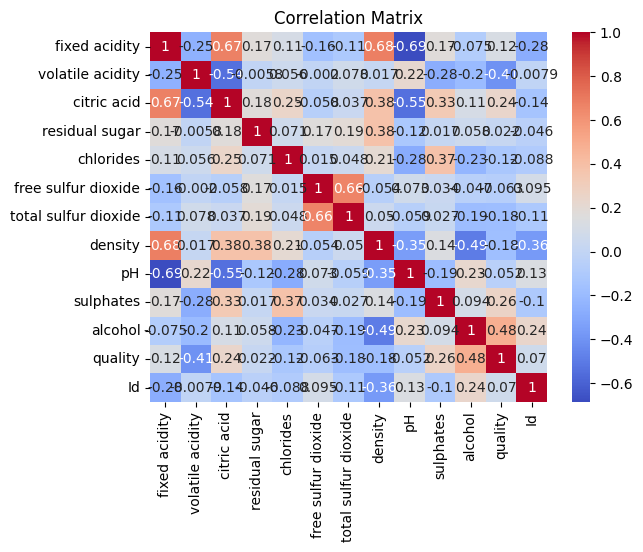

In [8]:
# Correlation matrix to understand feature relationships
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<Axes: xlabel='quality', ylabel='citric acid'>

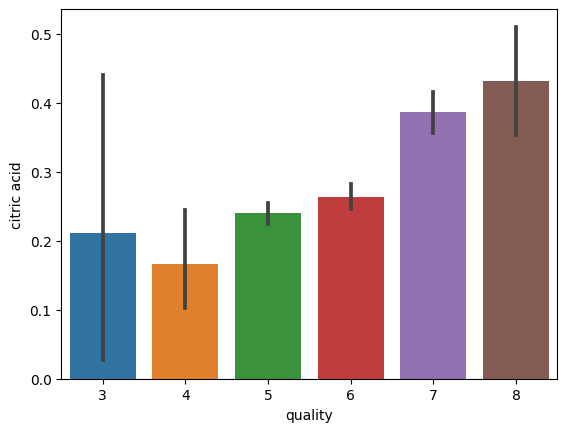

In [9]:
sns.barplot(x='quality',y='citric acid',data=data)

<Axes: xlabel='quality', ylabel='chlorides'>

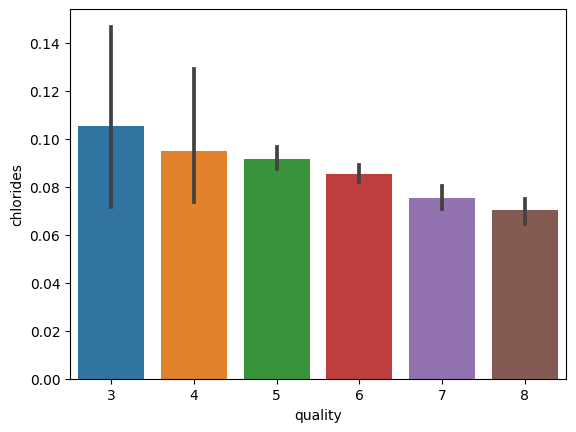

In [10]:
sns.barplot(x='quality',y='chlorides',data=data)

<Axes: xlabel='quality', ylabel='residual sugar'>

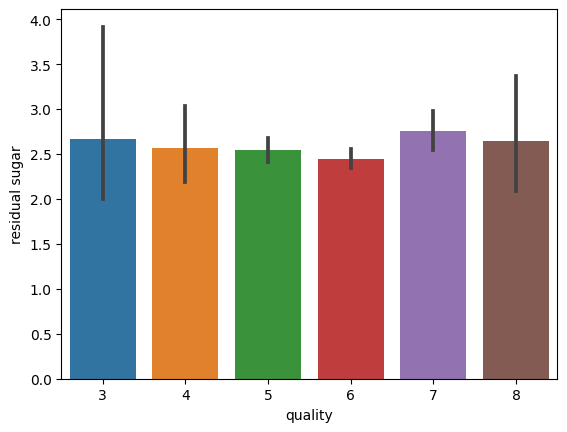

In [11]:
sns.barplot(x='quality',y='residual sugar',data=data)

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

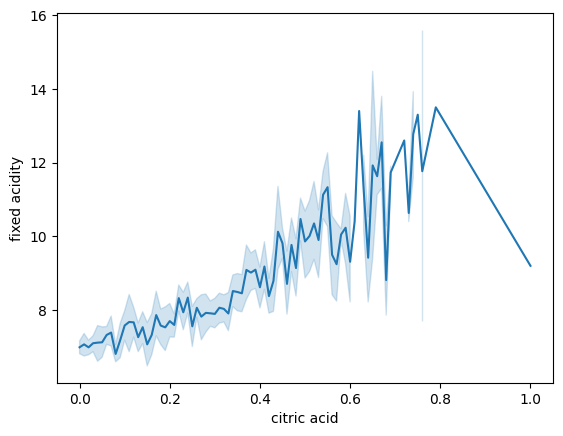

In [12]:
sns.lineplot(x='citric acid',y='fixed acidity',data=data)

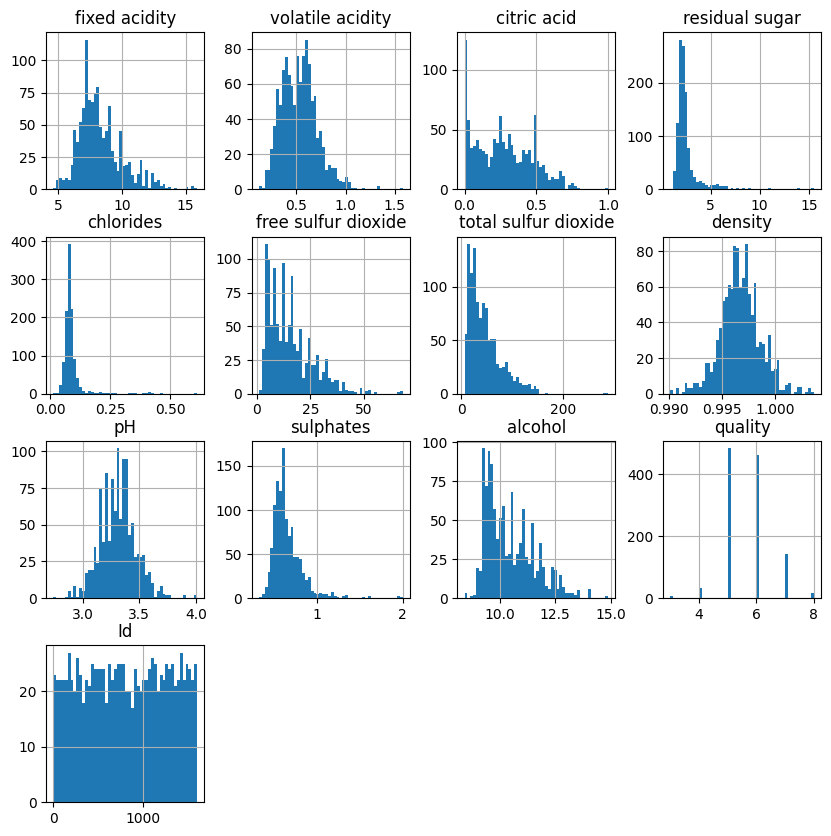

In [13]:
data.hist(figsize=(10,10),bins=50)
plt.show()

Splitting the data into Features and Targets

In [14]:
# Preprocessing: Selecting features and target variable
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Splitting the data into Training and Testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Building the Linear Regression Model
lr = LinearRegression()

# Fitting the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [17]:
# Model Evaluation
y_pred = lr.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 184153.56998432326
R-squared: 0.12257013370850611


Predictions and Visualization

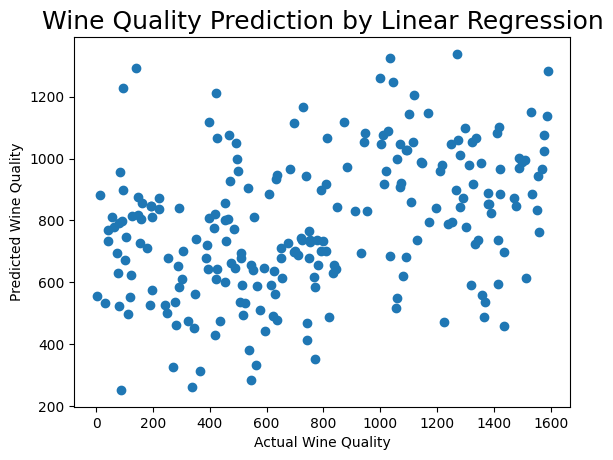

In [18]:
# To visualize the predictions against actual wine quality, we'll use a scatter plot
plt.scatter(y_test, y_pred)
plt.title("Wine Quality Prediction by Linear Regression", size=18)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.show()

In [19]:
# Let's use the trained model to make predictions on new data and visualize the results
new_data = [[8.3, 0.765, 0.069, 3.2, 0.583, 10, 198, 0.924, 3.45, 0.58, 9.1, 1426]]
predicted_price = lr.predict(new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: -39831.07147658309
